In [1]:
import json

token = {
  "username": "manhnguyen1912",
  "key": "KGAT_cee31f61cbd9b5b1d09853c03f8a3208"
}

with open("/content/kaggle.json", "w") as f:
    json.dump(token, f)


In [2]:
!pip install kaggle --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5


In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [5]:
!pip install --upgrade --force-reinstall kaggle




  Using cached kaggle-1.8.3-py3-none-any.whl.metadata (16 kB)
  Using cached black-25.12.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (86 kB)
  Using cached kagglesdk-0.1.14-py3-none-any.whl.metadata (13 kB)
  Using cached mypy-1.19.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.7 MB/s eta 0:00:00
  Using cached types_requests-2.32.4.20260107-py3-none-any.whl.metadata (2.0 kB)
  Using cached types_tqdm-4.67.0.20250809-py3-none-any.whl.metadata (1.7 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached pathspec-1.0.3-py3-none-any.whl.metadata (13 kB)
  Using cached pytokens-0.3.0-py3-none-any.whl.metadata (2.0 kB)
  Using cached librt-0.7.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (1.3 kB)
Using cached kaggle-1.8.3-py3-none-any.whl (102 kB)
Us

In [1]:
!kaggle datasets download -d ealaxi/paysim1



Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 95% 169M/178M [00:03<00:00, 76.9MB/s]
100% 178M/178M [00:03<00:00, 60.0MB/s]


In [6]:
!kaggle --version


Kaggle API 1.8.3


In [7]:
!ls ~/.kaggle/


kaggle.json


In [2]:
!unzip -q /content/paysim1.zip


In [3]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FILE = "PS_20174392719_1491204439457_log.csv"

chunks = pd.read_csv(FILE, chunksize=200_000)
df = pd.concat(chunk for i, chunk in zip(range(5), chunks))

print("Shape:", df.shape)
df.head()


Shape: (1000000, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


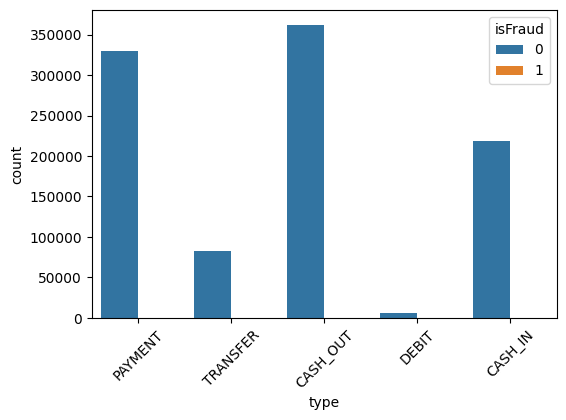

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="type", hue="isFraud", data=df)
plt.xticks(rotation=45)
plt.show()


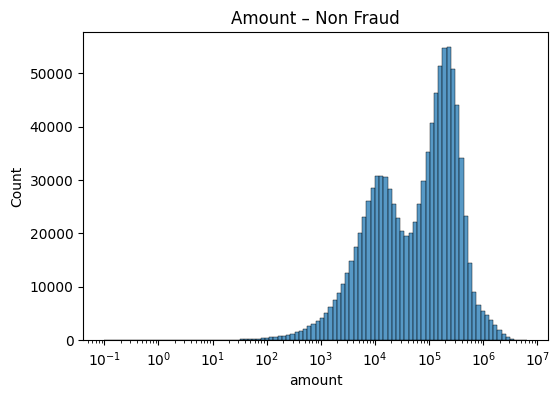

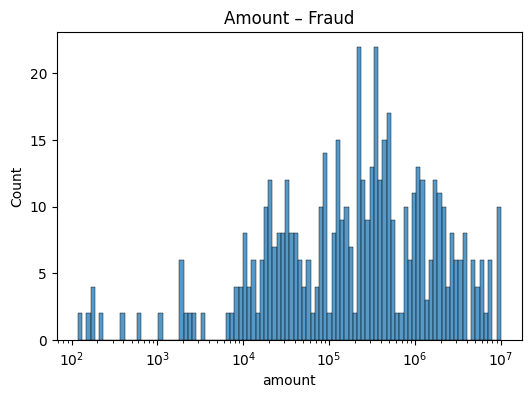

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df[df.isFraud==0]["amount"], bins=100, log_scale=True)
plt.title("Amount – Non Fraud")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df[df.isFraud==1]["amount"], bins=100, log_scale=True)
plt.title("Amount – Fraud")
plt.show()


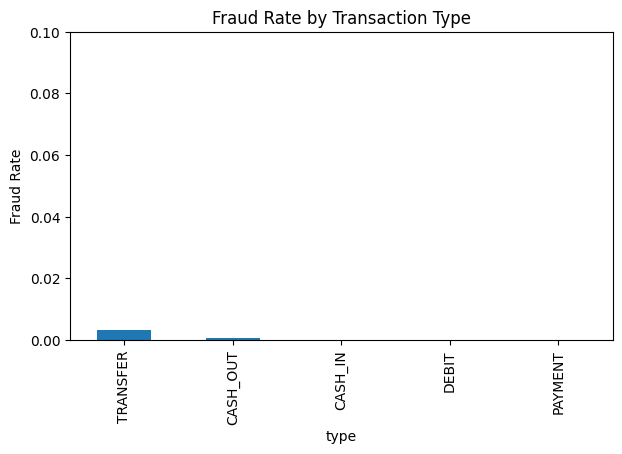

In [8]:
fraud_rate = (
    df.groupby("type")["isFraud"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(7,4))
fraud_rate.plot(kind="bar")
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Rate")
plt.ylim(0, 0.1)
plt.show()


In [9]:
df = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
print("After type filter:", df.shape)
print(df["type"].value_counts())
print(df["isFraud"].value_counts())


After type filter: (445100, 11)
type
CASH_OUT    362676
TRANSFER     82424
Name: count, dtype: int64
isFraud
0    444565
1       535
Name: count, dtype: int64


In [10]:
# Chênh lệch số dư thực tế
df["orig_diff"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["dest_diff"] = df["newbalanceDest"] - df["oldbalanceDest"]

# Chênh lệch so với amount
df["amount_diff_orig"] = df["amount"] - df["orig_diff"]
df["amount_diff_dest"] = df["amount"] - df["dest_diff"]


In [11]:
# ----- 1. Degree / Transaction count (Graph degree proxy) -----
df["orig_tx_count"] = df.groupby("nameOrig")["nameDest"].transform("count")
df["dest_tx_count"] = df.groupby("nameDest")["nameOrig"].transform("count")

df["orig_unique_dest"] = df.groupby("nameOrig")["nameDest"].transform("nunique")
df["dest_unique_orig"] = df.groupby("nameDest")["nameOrig"].transform("nunique")

# ----- 2. Amount aggregation -----
df["orig_sum_amount"] = df.groupby("nameOrig")["amount"].transform("sum")
df["dest_sum_amount"] = df.groupby("nameDest")["amount"].transform("sum")

df["orig_avg_amount"] = df["orig_sum_amount"] / (df["orig_tx_count"] + 1)

# ----- 3. Balance inconsistency (core fraud logic) -----
df["orig_diff"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["dest_diff"] = df["newbalanceDest"] - df["oldbalanceDest"]

df["amount_diff_orig"] = df["amount"] - df["orig_diff"]
df["amount_diff_dest"] = df["amount"] - df["dest_diff"]

# ----- 4. Fraud neighbor risk (graph proximity) -----
fraud_nodes = set(
    df.loc[df["isFraud"] == 1, "nameOrig"]
).union(
    set(df.loc[df["isFraud"] == 1, "nameDest"])
)

df["dest_is_fraud_node"] = df["nameDest"].isin(fraud_nodes).astype(int)

df["orig_fraud_neighbor_ratio"] = (
    df.groupby("nameOrig")["dest_is_fraud_node"].transform("mean")
)

df["fraud_neighbor_amount"] = df["amount"] * df["dest_is_fraud_node"]
df["orig_fraud_neighbor_amount_ratio"] = (
    df.groupby("nameOrig")["fraud_neighbor_amount"].transform("sum")
    /
    (df.groupby("nameOrig")["amount"].transform("sum") + 1)
)

# ----- 5. Flow imbalance / pass-through (laundering detection) -----
df["in_amount"] = df.groupby("nameDest")["amount"].transform("sum")
df["out_amount"] = df.groupby("nameOrig")["amount"].transform("sum")

df["flow_ratio"] = df["out_amount"] / (df["in_amount"] + 1)
df["pass_through_score"] = 1 - abs(df["in_amount"] - df["out_amount"]) / (df["in_amount"] + 1)

# ----- 6. Temporal transaction burst -----
WINDOW = 10
df = df.sort_values(["nameOrig", "step"])

df["tx_count_last_10"] = (
    df.groupby("nameOrig")["step"]
    .transform(lambda x: x.rolling(WINDOW, min_periods=1).count())
)

df["amount_last_10"] = (
    df.groupby("nameOrig")["amount"]
    .transform(lambda x: x.rolling(WINDOW, min_periods=1).sum())
)

df["tx_burst_score"] = df["tx_count_last_10"] / (df["orig_tx_count"] + 1)

# ----- 7. Group / funnel behavior -----
df["fan_in_out_ratio"] = (
    df["orig_unique_dest"] /
    (df["dest_unique_orig"] + 1)
)


In [12]:
print(df.isnull().sum())
df.fillna(0, inplace=True)


step                                0
type                                0
amount                              0
nameOrig                            0
oldbalanceOrg                       0
newbalanceOrig                      0
nameDest                            0
oldbalanceDest                      0
newbalanceDest                      0
isFraud                             0
isFlaggedFraud                      0
orig_diff                           0
dest_diff                           0
amount_diff_orig                    0
amount_diff_dest                    0
orig_tx_count                       0
dest_tx_count                       0
orig_unique_dest                    0
dest_unique_orig                    0
orig_sum_amount                     0
dest_sum_amount                     0
orig_avg_amount                     0
dest_is_fraud_node                  0
orig_fraud_neighbor_ratio           0
fraud_neighbor_amount               0
orig_fraud_neighbor_amount_ratio    0
in_amount   

In [13]:
df.drop(columns=["nameOrig", "nameDest",
    "isFlaggedFraud",
    "oldbalanceOrg", "newbalanceOrig",
    "oldbalanceDest", "newbalanceDest"], inplace=True) #loại bỏ các cột không cần thiết


In [14]:
features = [
    # Temporal
    "step",

    # Transaction
    "type",
    "amount",

    # Balance consistency
    "orig_diff",
    "dest_diff",
    "amount_diff_orig",
    "amount_diff_dest",

    # Graph-based degree
    "orig_tx_count",
    "dest_tx_count",
    "orig_unique_dest",
    "dest_unique_orig",

    # Graph-based flow
    "orig_sum_amount",
    "dest_sum_amount",
    "orig_avg_amount",

    # Fraud proximity
    "orig_fraud_neighbor_ratio"
]


X = df[features]
y = df["isFraud"]

print(X.shape)
print(y.value_counts())


(445100, 15)
isFraud
0    444565
1       535
Name: count, dtype: int64


In [15]:
X = pd.get_dummies(X, columns=["type"], drop_first=True)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train fraud:", y_train.sum())
print("Test fraud:", y_test.sum())


Train fraud: 428
Test fraud: 107


In [17]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos
print("scale_pos_weight:", scale_pos_weight)


scale_pos_weight: 830.9626168224299


Train shape: (356080, 15)
Fraud in train: 428
scale_pos_weight: 830.9626168224299

--- Training XGBoost ---
Threshold: 0.990126
Precision: 0.9057 | Recall: 0.8972 | F1: 0.9014
Confusion Matrix:
 [[88903    10]
 [   11    96]]

--- Training RandomForest ---
Threshold: 0.730499
Precision: 0.8468 | Recall: 0.8785 | F1: 0.8624
Confusion Matrix:
 [[88896    17]
 [   13    94]]

--- Training LogisticRegression ---
Threshold: 0.932064
Precision: 0.3852 | Recall: 0.8785 | F1: 0.5356
Confusion Matrix:
 [[88763   150]
 [   13    94]]

--- Training LightGBM ---
[LightGBM] [Info] Number of positive: 428, number of negative: 355652
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2206
[LightGBM] [Info] Number of data points in the train set: 356080, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Lig

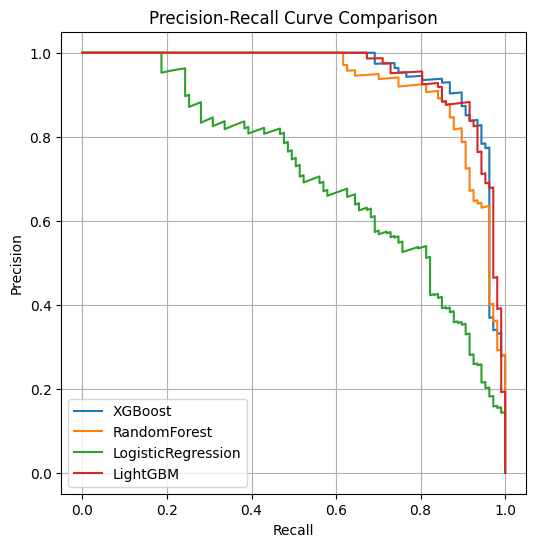

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    precision_recall_curve
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb

# Train / Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Fraud in train:", y_train.sum())

# scale_pos_weight (CHUẨN)

neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

print("scale_pos_weight:", scale_pos_weight)

# Models

models = {
    "XGBoost": XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        objective="binary:logistic",
        eval_metric="aucpr",
        random_state=42,
        n_jobs=-1
    ),

    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),

    "LogisticRegression": LogisticRegression(
        class_weight="balanced",
        max_iter=1000,
        solver="liblinear",
        random_state=42
    ),

    "LightGBM": lgb.LGBMClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        class_weight="balanced",
        random_state=42
    )
}


# Training & Evaluation

results = {}
target_recall = 0.87

for name, model in models.items():
    print(f"\n--- Training {name} ---")

    model.fit(X_train, y_train)

    # Predict probability
    y_prob = model.predict_proba(X_test)[:, 1]

    # Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

    # Threshold selection: recall >= target, max precision
    valid_idx = np.where(recall[:-1] >= target_recall)[0]
    if len(valid_idx) == 0:
        best_idx = -1
    else:
        best_idx = valid_idx[np.argmax(precision[valid_idx])]

    best_threshold = thresholds[best_idx]

    # Apply threshold
    y_pred_custom = (y_prob >= best_threshold).astype(int)

    # Metrics
    prec = precision_score(y_test, y_pred_custom)
    rec = recall_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    cm = confusion_matrix(y_test, y_pred_custom)

    results[name] = {
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "threshold": best_threshold,
        "confusion_matrix": cm,
        "y_prob": y_prob
    }

    print(f"Threshold: {best_threshold:.6f}")
    print(f"Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
    print("Confusion Matrix:\n", cm)

# PR Curve comparison
plt.figure(figsize=(6, 6))
for name, r in results.items():
    p, r_, _ = precision_recall_curve(y_test, r["y_prob"])
    plt.plot(r_, p, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid()
plt.show()


=== Model Comparison Metrics ===


,Model,Threshold,Precision,Recall,F1-score,TP,FP,TN,FN
0,XGBoost,0.990126,0.9057,0.8972,0.9014,96,10,88903,11
1,LightGBM,0.959725,0.8829,0.9159,0.8991,98,13,88900,9
2,RandomForest,0.730499,0.8468,0.8785,0.8624,94,17,88896,13
3,LogisticRegression,0.932064,0.3852,0.8785,0.5356,94,150,88763,13


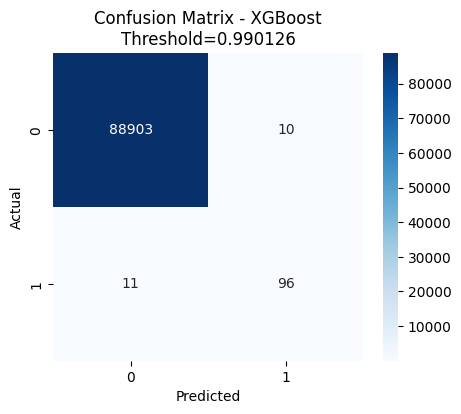

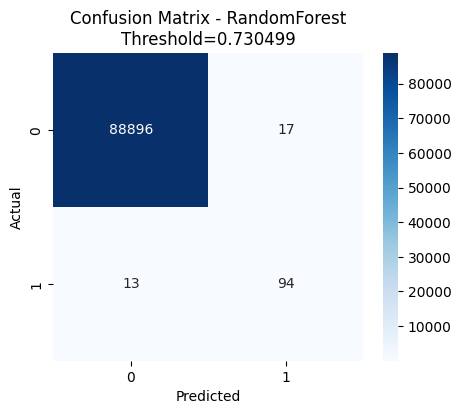

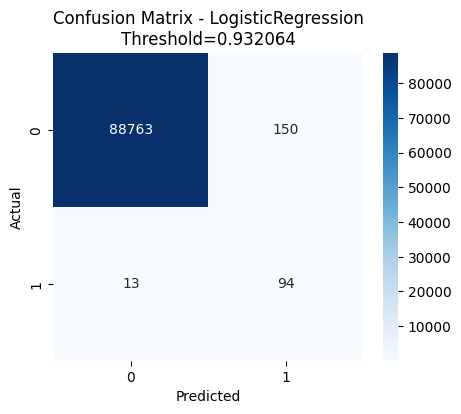

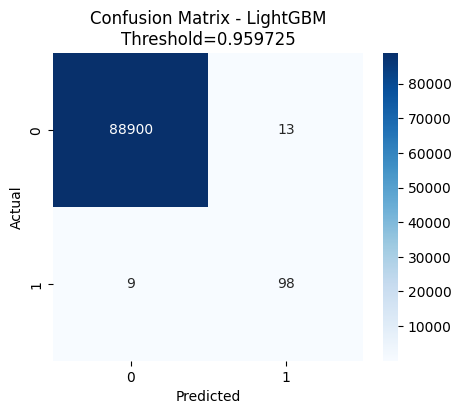

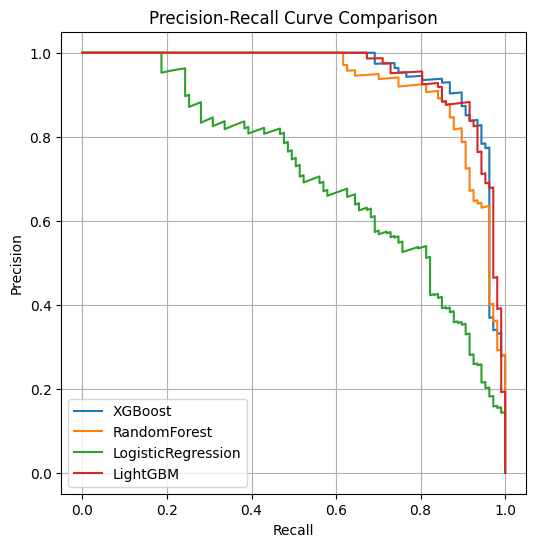

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chuẩn bị bảng so sánh metrics
metrics_list = []
for name, r in results.items():
    cm = r['confusion_matrix']
    metrics_list.append({
        "Model": name,
        "Threshold": r['threshold'],
        "Precision": r['precision'],
        "Recall": r['recall'],
        "F1-score": r['f1_score'],
        "TP": cm[1,1],
        "FP": cm[0,1],
        "TN": cm[0,0],
        "FN": cm[1,0]
    })

df_metrics = pd.DataFrame(metrics_list)
df_metrics = df_metrics.sort_values(by="F1-score", ascending=False).reset_index(drop=True)

# Hiển thị bảng metrics
print("=== Model Comparison Metrics ===")
display(df_metrics.style.format({
    "Threshold": "{:.6f}",
    "Precision": "{:.4f}",
    "Recall": "{:.4f}",
    "F1-score": "{:.4f}"
}))

# Vẽ confusion matrix heatmap cho từng model
for name, r in results.items():
    cm = r['confusion_matrix']
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}\nThreshold={r['threshold']:.6f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Vẽ PR Curve so sánh trực quan
plt.figure(figsize=(6,6))
for name, r in results.items():
    from sklearn.metrics import precision_recall_curve
    precision, recall, _ = precision_recall_curve(y_test, r['y_prob'])
    plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid()
plt.show()


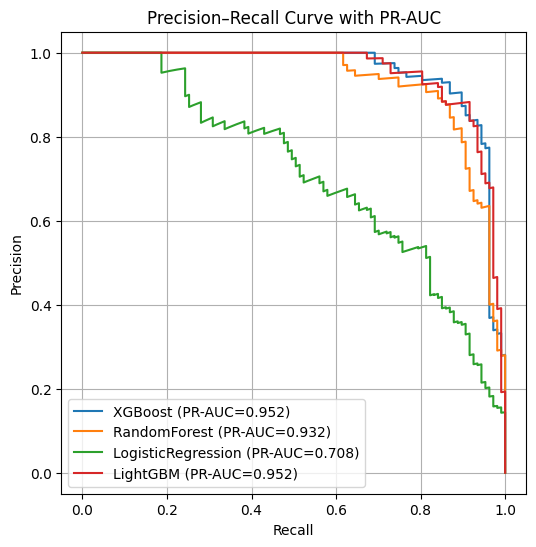

In [20]:
from sklearn.metrics import average_precision_score
plt.figure(figsize=(6,6))

for name, r in results.items():
    precision, recall, _ = precision_recall_curve(y_test, r["y_prob"])
    pr_auc = average_precision_score(y_test, r["y_prob"])
    plt.plot(recall, precision, label=f"{name} (PR-AUC={pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve with PR-AUC")
plt.legend()
plt.grid()
plt.show()
